## Goal of notebook

This notebook aims to quantify the effect of neglecting topological effects in the Stein dynamics. To do this, we investigate the output samples on a two-dimensional von Mises distribution.

# Import tools

In [18]:
from models.vM_sphere import vM_sphere
from src.samplers import samplers
from scripts.plot_helper_functions import collect_samples
import numpy as np
%matplotlib inline
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
import corner
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
from scripts.plot_helper_functions import set_axes_equal

# Setup von Mises distribution

In [19]:
kappa = 100
thetaTrue = np.array([0, np.pi/2])
model = vM_sphere(kappa=kappa, thetaTrue=thetaTrue)

# Visualize von Mises-Fisher samples

C:\Users\Alex\AppData\Local\Temp\ipykernel_30028\710681622.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


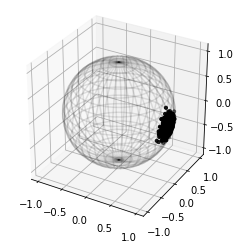

In [20]:
# Wireframe sphere
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))
ax.plot_wireframe(x, y, z, color='k', alpha=0.1, rstride=1, cstride=1)

# von Mises-Fisher samples
ground_truth = model.sample_vMF(mu=model.mu, kappa=kappa, num_samples=1000)
ax.scatter(ground_truth[:,0], ground_truth[:,1], ground_truth[:,2], s=10, c='k', zorder=10)

# Visualize
ax.set_box_aspect([1,1,1]) # IMPORTANT - this is the new, key line
set_axes_equal(ax) # IMPORTANT - this is also required
fig.show()

# Visualize von Mises-Fisher on $(\theta, \phi)$ space

In [21]:
ngrid = 500
x = np.linspace(0, 2 * np.pi, ngrid)
y = np.linspace(0, np.pi, ngrid)

X, Y = np.meshgrid(x, y)
Z = np.exp(-1 * model.getMinusLogPosterior_ensemble(np.vstack((np.ndarray.flatten(X), np.ndarray.flatten(Y))).T).reshape(ngrid,ngrid))

C:\Users\Alex\AppData\Local\Temp\ipykernel_30028\3561515033.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


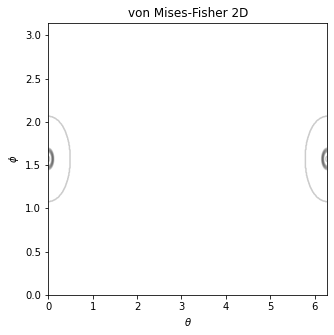

In [22]:
fig1, ax1 = plt.subplots(figsize = (5, 5))
ax1.contour(X, Y, Z, 7, colors='black', alpha=0.2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.title('von Mises-Fisher 2D')
fig1.show()

# Run dynamics

In [23]:
sampler1 = samplers(model=model, nIterations=100, nParticles=150, profile=False)
sampler1.apply(method='SVGD', eps=0.01)

bandwidth 4.000000


Stepsize 0.010000 | Median bandwidth: 3033.662206: 100%|██████████| 100/100 [00:04<00:00, 21.70it/s]

INFO:src.samplers:OUTPUT: Run completed successfully! Data stored in:
 C:\sSVN_GW\outdir\1658262041\output_data.h5


In [ ]:
sampler1 = samplers(model=model, nIterations=100, nParticles=150, profile=False)
sampler1.apply(method='SVGD', eps=0.02)

# Get summary statistics

# Get summary statistics

C:\Users\Alex\AppData\Local\Temp\ipykernel_30028\196971342.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


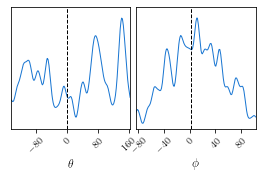

In [24]:
X1 = collect_samples(sampler1.history_path)
params = [r"$\theta$", r'$\phi$']
c = ChainConsumer().add_chain(X1, parameters=params)
summary = c.analysis.get_summary()
fig2 = c.plotter.plot_distributions(truth=[0, np.pi/2])
fig2.show()
# fig1 = corner.corner(X1) # X1 is one-dimensional

# Visualize samples on $\mathbb{S}^2 \hookrightarrow \mathbb{R}^3$

AttributeError: 'vM_sphere' object has no attribute 'embedding'

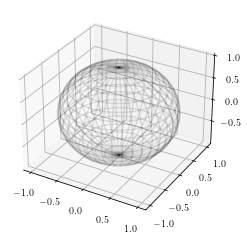

In [25]:
fig2, ax2 = plt.subplots(1, 1, subplot_kw={'projection':'3d'})

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))
ax2.plot_wireframe(x, y, z, color='k', alpha=0.1, rstride=1, cstride=1)

embedding_ensemble = lambda thetas: np.apply_along_axis(model.embedding, 1, thetas)
embedded_samples = embedding_ensemble(X1)
ax2.scatter(embedded_samples[:,0], embedded_samples[:,1], embedded_samples[:,2])
ax2.set_box_aspect([1,1,1]) # IMPORTANT - this is the new, key line
set_axes_equal(ax2) # IMPORTANT - this is also required
fig2.show()
#fig.show()

# Remarks
(1) Periodic coordinates can be "modded" to remain in the correct interval
(2) Under poor settings, particles may fall out of bounds on $\phi$ coordinate.
(3) Upon visual inspection, the particles appear to behave appropriately!



# Conclusion
There is certainly room for improvement with this scheme, however, it appears as though everything works as expected.

In [ ]:
theta_1 = np.pi/2
theta_2 = 7 * np.pi / 4

theta_1 - theta_2